# Bahrain Testing Analysis: Day 1

In [79]:
import pandas as pd
import fastf1
import fastf1.plotting
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
year = 2025
event_sched = fastf1.get_event_schedule(year)

req         WARNING 	DEFAULT CACHE ENABLED! (2.16 GB) /home/jjl20011/.cache/fastf1


In [3]:
testing = fastf1.get_testing_session(2025,1,1)

In [4]:
testing.load(laps=True, messages=False)

core           INFO 	Loading data for Pre-Season Testing - Practice 1 [v3.4.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

In [6]:
dir(testing)

['_QUALI_LIKE_SESSIONS',
 '_RACE_LIKE_SESSIONS',
 '_Session__fix_tyre_info',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_first_lap_time_from_ergast',
 '_add_track_status_to_laps',
 '_calculate_quali_like_session_results',
 '_calculate_t0_date',
 '_car_data',
 '_check_lap_accuracy',
 '_drivers_from_f1_api',
 '_drivers_results_from_ergast',
 '_ergast',
 '_fix_missing_laps_retired_on_track',
 '_get_property_warn_not_loaded',
 '_laps',
 '_load_drivers_results',
 '_load_laps_data',
 '_load_race_control_messages',
 '_load_session_info',
 '_load_session_status_data',
 '_load_telemetry',
 '_load_total_lap_count',
 '_load_track_status_data',
 '_load_weather_data',
 '_

In [12]:
testing.laps.keys()

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [13]:
testing.laps['Driver'].unique()

array(['VER', 'NOR', 'BOR', 'HAD', 'DOO', 'GAS', 'ANT', 'ALO', 'LEC',
       'STR', 'TSU', 'ALB', 'HUL', 'LAW', 'OCO', 'HAM', 'SAI', 'RUS',
       'PIA', 'BEA'], dtype=object)

In [75]:
laps['Compound'].unique()

array(['HARD', 'MEDIUM'], dtype=object)

In [86]:
laps = testing.laps.pick_drivers("LEC").pick_quicklaps()

In [21]:
laps.keys()

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [22]:
laps['LapTime'].dtype

dtype('<m8[ns]')

In [87]:
laps['LapTimeSec'] = laps['LapTime'].dt.total_seconds()

/tmp/ipykernel_3878046/3038783788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTimeSec'] = laps['LapTime'].dt.total_seconds()


In [61]:
laps['LapNumber'].dtype

dtype('float64')

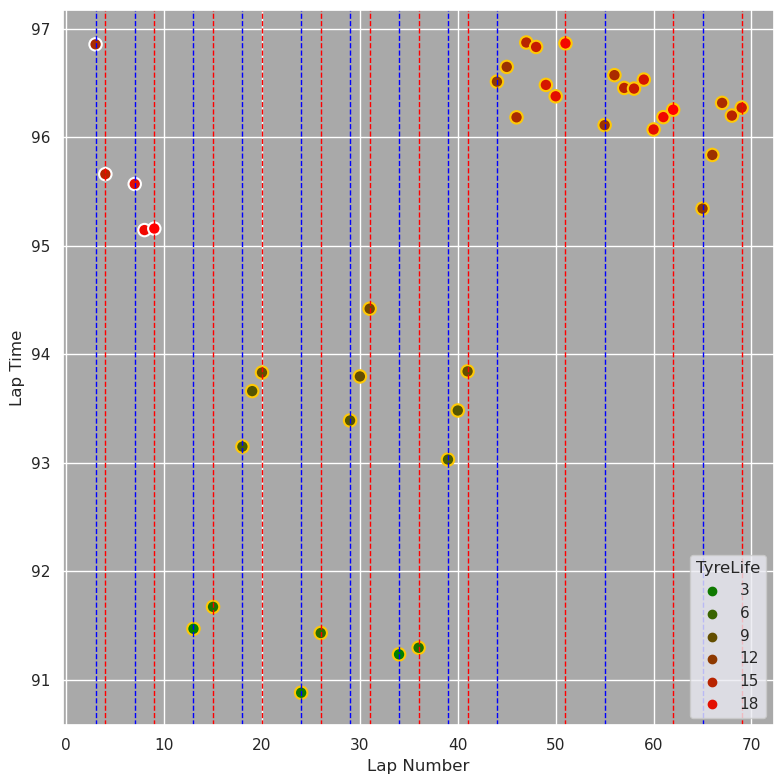

In [88]:


fig, ax = plt.subplots(figsize=(8,8))
# sns.set_theme(style='darkgrid')
tire_palette = {'HARD':'#FFFFFF', 'MEDIUM':'#FFC906', 'SOFT':'#CC1E4A'}
cmap_vals = LinearSegmentedColormap.from_list("green_red", ["green", "red"])

sns.scatterplot(
    data=laps,
    x='LapNumber',
    y='LapTimeSec',
    palette=cmap_vals,
    ax=ax,
    hue="TyreLife",
    s=80,
    linewidth=1.5,
    legend='auto',
    edgecolor=laps['Compound'].map(tire_palette)
)
# plt.colorbar(label='TyreLife')
ax.set_facecolor("darkgray")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

for x in laps['Stint'].unique():
    start_lap = laps.loc[laps['Stint']==x,'LapNumber'].min()
    fin_lap = laps.loc[laps['Stint']==x,'LapNumber'].max()
    if start_lap == fin_lap:
        plt.axvline(x=fin_lap, color='purple', linestyle='--', linewidth=1)
    else:
        plt.axvline(x=start_lap, color='blue', linestyle='--', linewidth=1)
        plt.axvline(x=fin_lap, color='red', linestyle='--', linewidth=1)

# plt.grid(color='w', which='major', axis='both')
# sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()